# Guided Project - Exploring Hacker News Posts
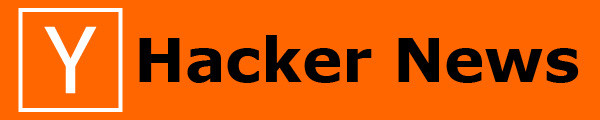
 
### Company Background:
Hacker News is a site where users receive votes and comments on submitted stories (or posts).  Top posts on Hacker News may receive hundreds of thousands of visitors.  

### **Project Goal:**

My goal as the Data Analyst is to answer two questions:
* Does <mark>Ask HN or Show HN</mark> receive more comments? 
* Do posts created at certain times receive more comments on average?

> **This project will use the following six steps of the data analysis process to answer the above two questions of the project goal:**
> * 1.) Ask Question
> * 2.) Get Data
> * 3.) Explore Data
> * 4.) Clean Data
> * 5.) Analyze Data
> * 6.) Conclusion


##  Ask Question:

My goal as the Data Analyst is to answer two questions:
* Does <mark>Ask HN or Show HN</mark> receive more comments on average?
* Do posts created at certain times receive more comments on average?

## Get Data  

The data set that will be used for analysis can be found [here](https://www.kaggle.com/hacker-news/hacker-news-posts).
The data set includes submissions to the Hacker News site.

In [12]:
# Reduced dataset from 300,000 rows to 20,000 rows by removing all submissions without a comment

opened_file = open("hacker_news.csv")
from csv import reader
read_file = reader(opened_file)
hn = list(read_file)
 
headers = hn[0]
print(headers)
hn = hn[1:] ## remove header
print(hn[0])
 
 

['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at']
['12224879', 'Interactive Dynamic Video', 'http://www.interactivedynamicvideo.com/', '386', '52', 'ne0phyte', '8/4/2016 11:52']


In [13]:
#import modules
import datetime as dt

## Explore Data

#Data Dictionary
* id: the unique identifier from Hacker News for the post
* title: the title of the post
* url: the URL that the posts links to, if the post has a URL
* num_points: the number of points the post acquired, calculated as the total number of upvotes minus the total number of downvotes
* num_comments: the number of comments on the post
* author: the username of the person who submitted the post
* created_at: the date and time of the post's submission

## Clean Data

Find posts that begin with <mark>Ask HN</mark> or <mark>Show HN</mark>


In [14]:
ask_posts = []
show_posts = []
other_posts = []

for row in hn:
    title = row[1]
    title = title.lower()
    if title.startswith("ask hn"):
        ask_posts.append(row)
    elif title.startswith("show hn"):
        show_posts.append(row)
    else:
        other_posts.append(row)
        
print("Number of Posts begin with 'Ask HN': ", len(ask_posts), "\n","Number of posts begin with 'Show HN': ", len(show_posts),"\n", "Number of Other posts:", len(other_posts))

Number of Posts begin with 'Ask HN':  1744 
 Number of posts begin with 'Show HN':  1162 
 Number of Other posts: 17194


Calculate the average number of comments per posts for:
* Ask HN
* Show HN
 

In [15]:
# Calc the average comments per ask_posts
total_ask_comments = 0
for row in ask_posts:
    num = int(row[4])
    
    total_ask_comments += num

avg_ask_comments = total_ask_comments / len(ask_posts)
print("Average number of comments for Ask HN:")
avg_ask_comments
 

Average number of comments for Ask HN:


14.038417431192661

In [16]:
# Find the average comments per show_posts
total_show_comments = 0
for post in show_posts:
    num_1 = int(post[4])
    
    total_show_comments += num_1

avg_show_comments = total_show_comments / len(show_posts)
print("Average number of comments for Show HN:")
avg_show_comments
 

Average number of comments for Show HN:


10.31669535283993

> The <mark>Ask HN</mark> posts receive more comments.  The <mark>Ask HN</mark> posts receive around 14 comments per post while the <mark>Show HN</mark> posts receive around 10 comments per post.

Since <mark>Ask HN</mark> posts receive more comments, the analysis will focus on <mark>Ask HN</mark> posts only.

## Analyze Ask Posts Data

Determine if <mark>Ask Posts</mark> created at certain times have more comments:

* calculate the number of <mark>Ask Posts</mark> created each hour along with # comments received

* calculate average number of comments <mark>Ask Posts</mark> receives by hour created

* identify the top five hours with the highest comments per post

* identify the best hours to create a post to have a higher chance of receiving comments


> Calculate the number of <mark>Ask Posts</mark> created each hour along with the number of comments received

In [17]:
# calculate the number of ask posts created each hour along with # comments received
 
result_list = []
for post in ask_posts:
    created_at_col = post[6]
    num_comments_col = post[4]
    result_list.append([created_at_col, num_comments_col]) # create at time and dat, number of comments

counts_by_hour = {} 
comments_by_hour = {}

for row in result_list:
    date = row[0]
    comment_num = int(row[1])
    date_formatted_dt = dt.datetime.strptime(date,"%m/%d/%Y %H:%M")
    hour = date_formatted_dt.hour
    if hour not in counts_by_hour:
        counts_by_hour[hour] = 1
        comments_by_hour[hour] = comment_num
    elif hour in counts_by_hour:
        counts_by_hour[hour] += 1
        comments_by_hour[hour] += comment_num
        
print("Posts per hour:","\n",counts_by_hour,"\n", "\n","Comments per hour:","\n",comments_by_hour) 

Posts per hour: 
 {9: 45, 13: 85, 10: 59, 14: 107, 16: 108, 23: 68, 12: 73, 17: 100, 15: 116, 21: 109, 20: 80, 2: 58, 18: 109, 3: 54, 5: 46, 19: 110, 1: 60, 22: 71, 8: 48, 4: 47, 0: 55, 6: 44, 7: 34, 11: 58} 
 
 Comments per hour: 
 {9: 251, 13: 1253, 10: 793, 14: 1416, 16: 1814, 23: 543, 12: 687, 17: 1146, 15: 4477, 21: 1745, 20: 1722, 2: 1381, 18: 1439, 3: 421, 5: 464, 19: 1188, 1: 683, 22: 479, 8: 492, 4: 337, 0: 447, 6: 397, 7: 267, 11: 641}


> Calculate average number of comments <mark>Ask Posts</mark> receives by the hour created

In [18]:
#calculate average number of comments ask posts receives by hour created
avg_by_hour =  []
for hour in comments_by_hour:
     avg_by_hour.append([hour,comments_by_hour[hour]/counts_by_hour[hour]])
print("Average number of comments per post by hour:")
avg_by_hour

Average number of comments per post by hour:


[[9, 5.5777777777777775],
 [13, 14.741176470588234],
 [10, 13.440677966101696],
 [14, 13.233644859813085],
 [16, 16.796296296296298],
 [23, 7.985294117647059],
 [12, 9.41095890410959],
 [17, 11.46],
 [15, 38.5948275862069],
 [21, 16.009174311926607],
 [20, 21.525],
 [2, 23.810344827586206],
 [18, 13.20183486238532],
 [3, 7.796296296296297],
 [5, 10.08695652173913],
 [19, 10.8],
 [1, 11.383333333333333],
 [22, 6.746478873239437],
 [8, 10.25],
 [4, 7.170212765957447],
 [0, 8.127272727272727],
 [6, 9.022727272727273],
 [7, 7.852941176470588],
 [11, 11.051724137931034]]

> Identify the top five hours with the highest comments per post:

> * create a list of list with <mark>average</mark> as first element and <mark>hour</mark> as 2nd element

> * sort the list and print the top 5 hours with the most average comments per hour

In [19]:
#create a list with avg_by_hour swapped columns
swap_avg_by_hour = []
for hour in avg_by_hour:
    swap_avg_by_hour.append([hour[1],hour[0]])
swap_avg_by_hour

[[5.5777777777777775, 9],
 [14.741176470588234, 13],
 [13.440677966101696, 10],
 [13.233644859813085, 14],
 [16.796296296296298, 16],
 [7.985294117647059, 23],
 [9.41095890410959, 12],
 [11.46, 17],
 [38.5948275862069, 15],
 [16.009174311926607, 21],
 [21.525, 20],
 [23.810344827586206, 2],
 [13.20183486238532, 18],
 [7.796296296296297, 3],
 [10.08695652173913, 5],
 [10.8, 19],
 [11.383333333333333, 1],
 [6.746478873239437, 22],
 [10.25, 8],
 [7.170212765957447, 4],
 [8.127272727272727, 0],
 [9.022727272727273, 6],
 [7.852941176470588, 7],
 [11.051724137931034, 11]]

In [20]:
# sort new list of list swap_avg_by_hour

sorted_swap = sorted(swap_avg_by_hour, reverse = True)

print("Top 5 Hours for Ask Posts Comments")

for comment_hour in sorted_swap[:5]:
    hour_avg_comment = str(comment_hour[1]) # 15 convert to str
    hour_dt = dt.datetime.strptime(hour_avg_comment, "%H")# 1900-01-01 15:00:00
    hour_formatted = hour_dt.strftime("%H:%M") # 15:00
     
    template = "{hour} {avg_comment:.2f} average comments per post".format(hour=hour_formatted, avg_comment = comment_hour[0])
    print(template)

Top 5 Hours for Ask Posts Comments
15:00 38.59 average comments per post
02:00 23.81 average comments per post
20:00 21.52 average comments per post
16:00 16.80 average comments per post
21:00 16.01 average comments per post


> Identify the best hours to create a post to have a higher chance of receiving comments

# Conclusion 

This project answers two questions:

**Does Ask HN or Show HN receive more comments on average?** 
Based on the above analysis, Ask HN receives around 14 comments per post while Show HN receives 10

**Do posts created at certain times receive more comments on average?**

The best hour to create a post is at 15:00 or 3:00 pm Eastern time.  Based on TABLE 1 below, the 15:00 hour receives the highest average comments per post at 38.59.    

<mark>TABLE 1:</mark>

**<u>Top 5 Hours for Ask Posts Comments</u>**

15:00 38.59 average comments per post

02:00 23.81 average comments per post

20:00 21.52 average comments per post

16:00 16.80 average comments per post

21:00 16.01 average comments per post